In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)
sns.set_theme()

In [2]:
df = pd.read_csv('final_dataset.csv')

In [3]:
df.head()

,date,prcp(mm/day),tmax(C),tmin(C),tavg(C),srad_lw(w/m2),srad_sw(w/m2),wind_u(m/s),wind_v(m/s),wind(m/s),rel_hum(%),pet(mm/day),pet_gleam(mm/day),aet_gleam(mm/day),evap_canopy(mm/day),evap_surface(mm/day),sm_lvl1(kg/m2),sm_lvl2(kg/m2),sm_lvl3(kg/m2),sm_lvl4(kg/m2),lstm_streamflow,streamflow_observed,flood_occurred
0,1980-01-01,0.0,28.11,14.04,21.08,335.40,308.97,0.51,-0.20,0.55,57.89,NaN,2.85,2.03,0.0,0.79,6.93,66.29,153.43,511.52,73.769,111.1,0
1,1980-01-02,0.0,28.33,13.94,21.14,345.16,303.75,0.42,0.48,0.64,60.80,NaN,2.90,2.07,0.0,0.75,6.74,66.07,153.25,511.37,98.157,113.4,0
2,1980-01-03,0.0,28.16,14.35,21.26,349.14,300.51,0.63,0.29,0.69,61.53,NaN,2.76,1.89,0.0,0.70,6.56,65.85,153.09,511.23,121.992,104.3,0
3,1980-01-04,0.0,28.33,14.83,21.58,353.16,299.13,-1.65,0.79,1.83,55.99,NaN,2.71,1.81,0.0,0.73,6.39,65.64,152.91,511.09,133.136,104.1,0
4,1980-01-05,0.0,28.05,14.73,21.39,348.57,305.00,-1.61,0.74,1.77,52.61,NaN,2.88,1.92,0.0,0.73,6.23,65.42,152.74,510.95,133.301,103.7,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14976 entries, 0 to 14975
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  14976 non-null  object 
 1   prcp(mm/day)          14976 non-null  float64
 2   tmax(C)               14976 non-null  float64
 3   tmin(C)               14976 non-null  float64
 4   tavg(C)               14976 non-null  float64
 5   srad_lw(w/m2)         14976 non-null  float64
 6   srad_sw(w/m2)         14976 non-null  float64
 7   wind_u(m/s)           14976 non-null  float64
 8   wind_v(m/s)           14976 non-null  float64
 9   wind(m/s)             14976 non-null  float64
 10  rel_hum(%)            14976 non-null  float64
 11  pet(mm/day)           14610 non-null  float64
 12  pet_gleam(mm/day)     14976 non-null  float64
 13  aet_gleam(mm/day)     14976 non-null  float64
 14  evap_canopy(mm/day)   14976 non-null  float64
 15  evap_surface(mm/day

In [5]:
(1 - df['streamflow_observed'].isnull().sum()/len(df))*100

np.float64(94.99866452991454)

In [6]:
df.isnull().sum()

date                      0
prcp(mm/day)              0
tmax(C)                   0
tmin(C)                   0
tavg(C)                   0
srad_lw(w/m2)             0
srad_sw(w/m2)             0
wind_u(m/s)               0
wind_v(m/s)               0
wind(m/s)                 0
rel_hum(%)                0
pet(mm/day)             366
pet_gleam(mm/day)         0
aet_gleam(mm/day)         0
evap_canopy(mm/day)       0
evap_surface(mm/day)      0
sm_lvl1(kg/m2)            0
sm_lvl2(kg/m2)            0
sm_lvl3(kg/m2)            0
sm_lvl4(kg/m2)            0
lstm_streamflow           0
streamflow_observed     749
flood_occurred            0
dtype: int64

In [7]:
import pandas as pd
import numpy as np # Ensure numpy is imported for numerical operations
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For plotting style

# Assume 'df' is your current DataFrame as per the latest info() output

# --- Step 1: Convert 'date' column to DatetimeIndex ---
print("--- DataFrame Info BEFORE setting DatetimeIndex ---")
print(df.info())

df['date'] = pd.to_datetime(df['date']) # Convert the 'date' column to datetime objects
df = df.set_index('date').sort_index() # Set 'date' as index and sort it chronologically

print("\n--- DataFrame Info AFTER setting DatetimeIndex ---")
print(df.info())
print("\n--- DataFrame Head AFTER setting DatetimeIndex ---")
print(df.head())


# --- Step 2: Handle Missing Values ---
cols_with_missing = ['pet(mm/day)', 'streamflow_observed']

print("\n--- Missing values BEFORE imputation (after index fix) ---")
print(df[cols_with_missing].isnull().sum())

# Apply linear interpolation (fills NaNs between valid observations)
for col in cols_with_missing:
    df[col] = df[col].interpolate(method='linear')

# For 'pet(mm/day)', specifically, apply backward-fill (bfill) to handle NaNs at the beginning
# if they were not filled by linear interpolation (e.g., if there are leading NaNs)
df['pet(mm/day)'] = df['pet(mm/day)'].bfill()

print("\n--- Missing values AFTER imputation ---")
print(df[cols_with_missing].isnull().sum())

# Final verification of the dataset
print("\n--- Final Dataset Info After All Preprocessing ---")
print(df.info())

--- DataFrame Info BEFORE setting DatetimeIndex ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14976 entries, 0 to 14975
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  14976 non-null  object 
 1   prcp(mm/day)          14976 non-null  float64
 2   tmax(C)               14976 non-null  float64
 3   tmin(C)               14976 non-null  float64
 4   tavg(C)               14976 non-null  float64
 5   srad_lw(w/m2)         14976 non-null  float64
 6   srad_sw(w/m2)         14976 non-null  float64
 7   wind_u(m/s)           14976 non-null  float64
 8   wind_v(m/s)           14976 non-null  float64
 9   wind(m/s)             14976 non-null  float64
 10  rel_hum(%)            14976 non-null  float64
 11  pet(mm/day)           14610 non-null  float64
 12  pet_gleam(mm/day)     14976 non-null  float64
 13  aet_gleam(mm/day)     14976 non-null  float64
 14  evap_canopy(mm/day

In [8]:
df.isnull().sum()

prcp(mm/day)            0
tmax(C)                 0
tmin(C)                 0
tavg(C)                 0
srad_lw(w/m2)           0
srad_sw(w/m2)           0
wind_u(m/s)             0
wind_v(m/s)             0
wind(m/s)               0
rel_hum(%)              0
pet(mm/day)             0
pet_gleam(mm/day)       0
aet_gleam(mm/day)       0
evap_canopy(mm/day)     0
evap_surface(mm/day)    0
sm_lvl1(kg/m2)          0
sm_lvl2(kg/m2)          0
sm_lvl3(kg/m2)          0
sm_lvl4(kg/m2)          0
lstm_streamflow         0
streamflow_observed     0
flood_occurred          0
dtype: int64

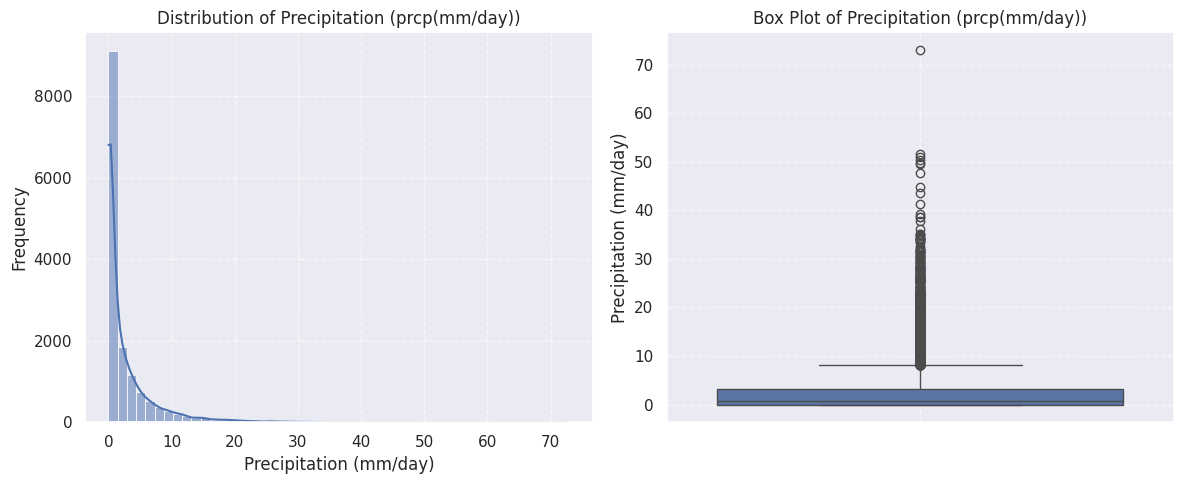

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported if this is a fresh cell run

# Assume 'df' is your preprocessed DataFrame from previous steps

# Create subplots for histogram/kde and box plot
plt.figure(figsize=(12, 5))

# Subplot 1: Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df['prcp(mm/day)'], kde=True, bins=50)
plt.title('Distribution of Precipitation (prcp(mm/day))')
plt.xlabel('Precipitation (mm/day)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)

# Subplot 2: Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['prcp(mm/day)'])
plt.title('Box Plot of Precipitation (prcp(mm/day))')
plt.ylabel('Precipitation (mm/day)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

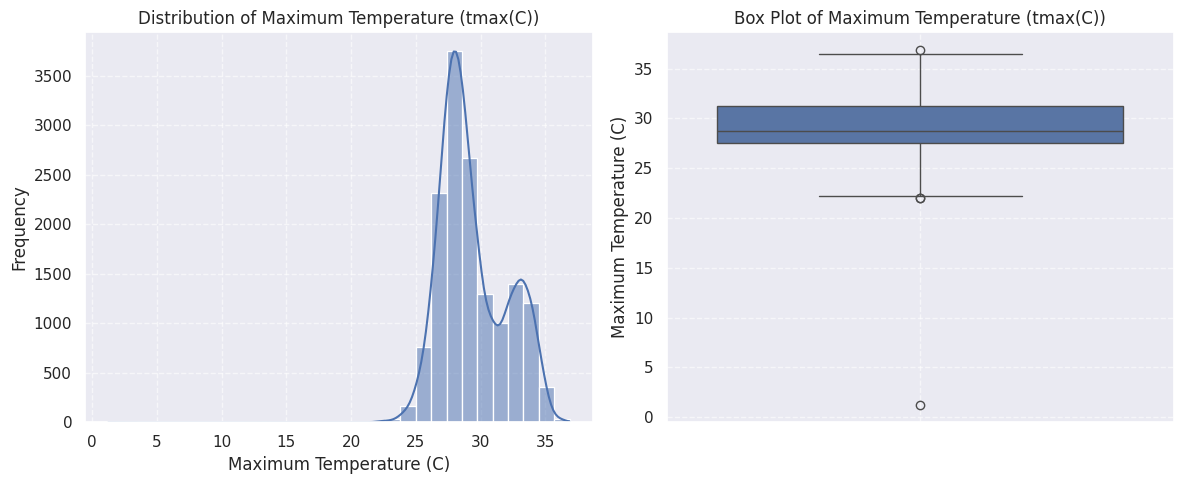

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'df' is your preprocessed DataFrame

plt.figure(figsize=(12, 5))

# Subplot 1: Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df['tmax(C)'], kde=True, bins=30)
plt.title('Distribution of Maximum Temperature (tmax(C))')
plt.xlabel('Maximum Temperature (C)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)

# Subplot 2: Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['tmax(C)'])
plt.title('Box Plot of Maximum Temperature (tmax(C))')
plt.ylabel('Maximum Temperature (C)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

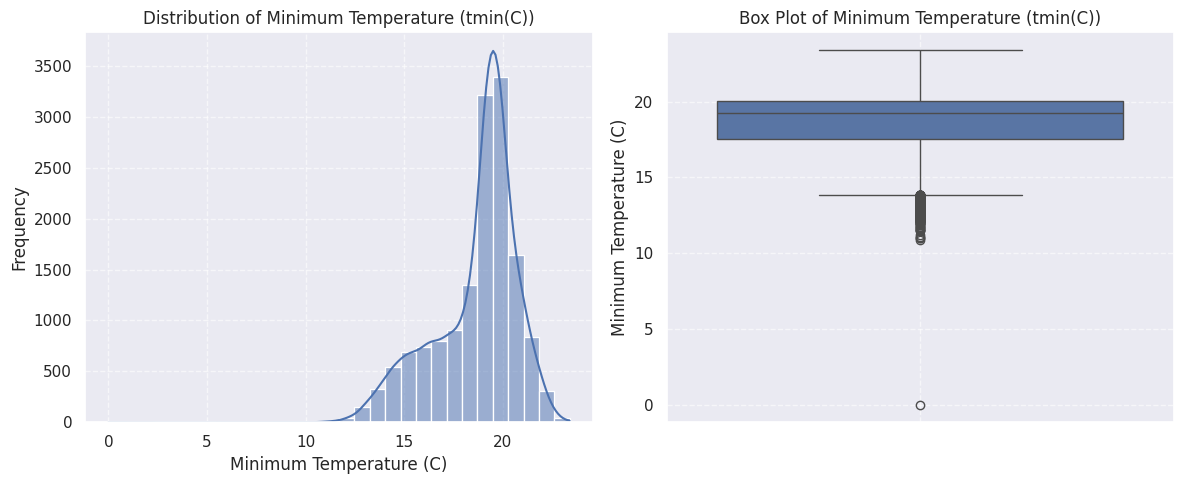

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'df' is your preprocessed DataFrame

plt.figure(figsize=(12, 5))

# Subplot 1: Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df['tmin(C)'], kde=True, bins=30)
plt.title('Distribution of Minimum Temperature (tmin(C))')
plt.xlabel('Minimum Temperature (C)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)

# Subplot 2: Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['tmin(C)'])
plt.title('Box Plot of Minimum Temperature (tmin(C))')
plt.ylabel('Minimum Temperature (C)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

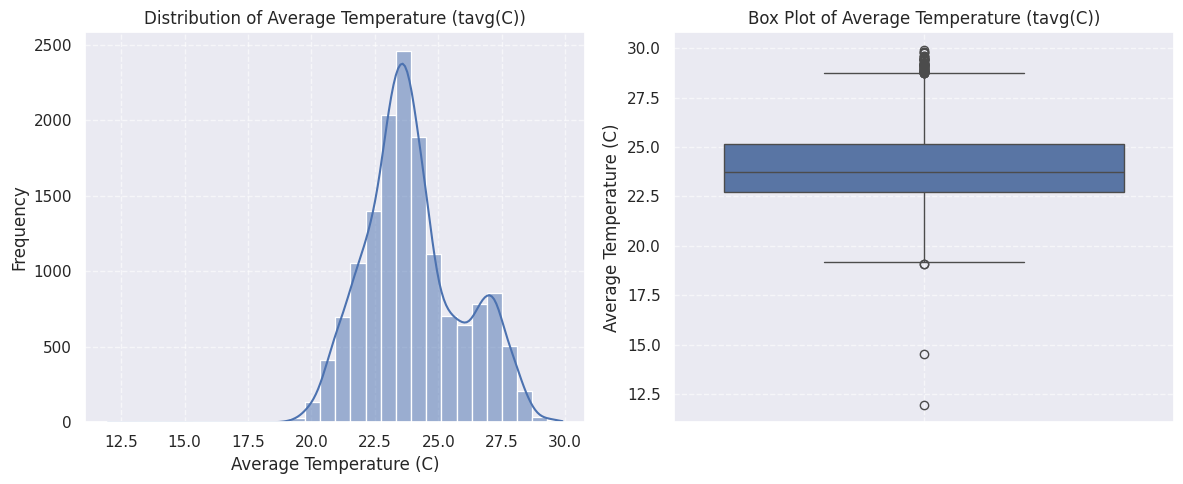

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'df' is your preprocessed DataFrame

plt.figure(figsize=(12, 5))

# Subplot 1: Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df['tavg(C)'], kde=True, bins=30)
plt.title('Distribution of Average Temperature (tavg(C))')
plt.xlabel('Average Temperature (C)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)

# Subplot 2: Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['tavg(C)'])
plt.title('Box Plot of Average Temperature (tavg(C))')
plt.ylabel('Average Temperature (C)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

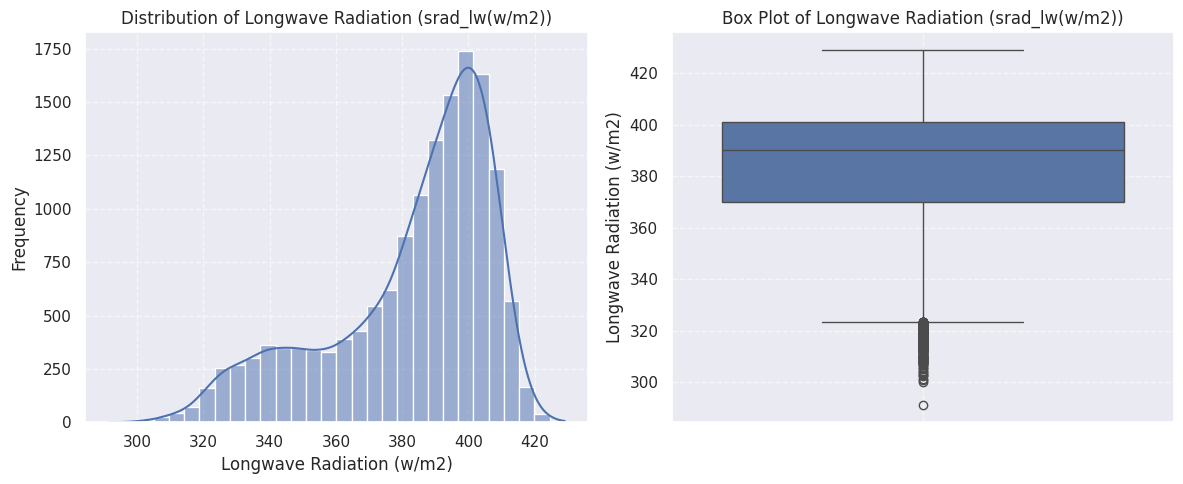

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'df' is your preprocessed DataFrame

plt.figure(figsize=(12, 5))

# Subplot 1: Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df['srad_lw(w/m2)'], kde=True, bins=30)
plt.title('Distribution of Longwave Radiation (srad_lw(w/m2))')
plt.xlabel('Longwave Radiation (w/m2)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)

# Subplot 2: Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['srad_lw(w/m2)'])
plt.title('Box Plot of Longwave Radiation (srad_lw(w/m2))')
plt.ylabel('Longwave Radiation (w/m2)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

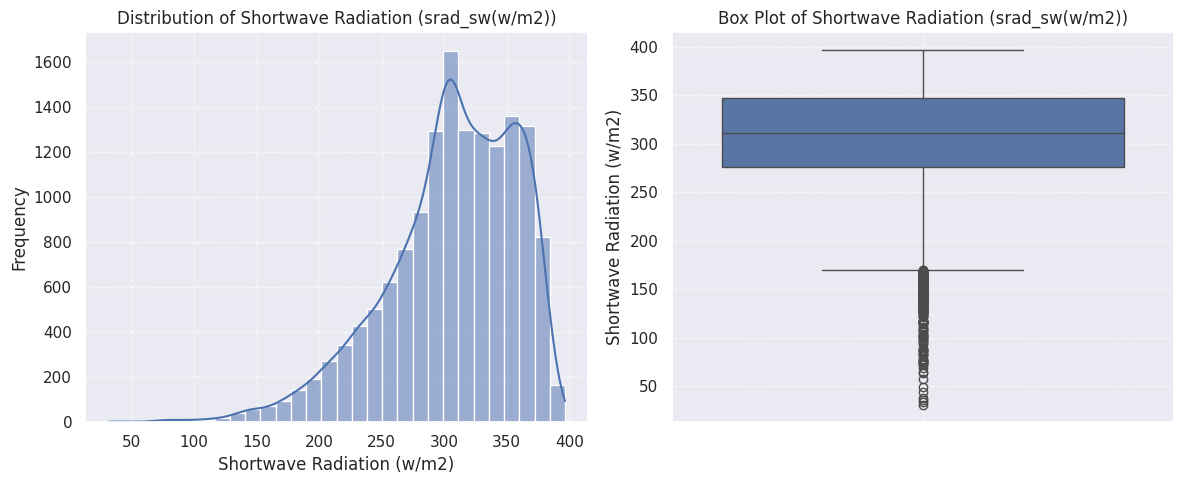

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'df' is your preprocessed DataFrame

plt.figure(figsize=(12, 5))

# Subplot 1: Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df['srad_sw(w/m2)'], kde=True, bins=30)
plt.title('Distribution of Shortwave Radiation (srad_sw(w/m2))')
plt.xlabel('Shortwave Radiation (w/m2)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)

# Subplot 2: Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['srad_sw(w/m2)'])
plt.title('Box Plot of Shortwave Radiation (srad_sw(w/m2))')
plt.ylabel('Shortwave Radiation (w/m2)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

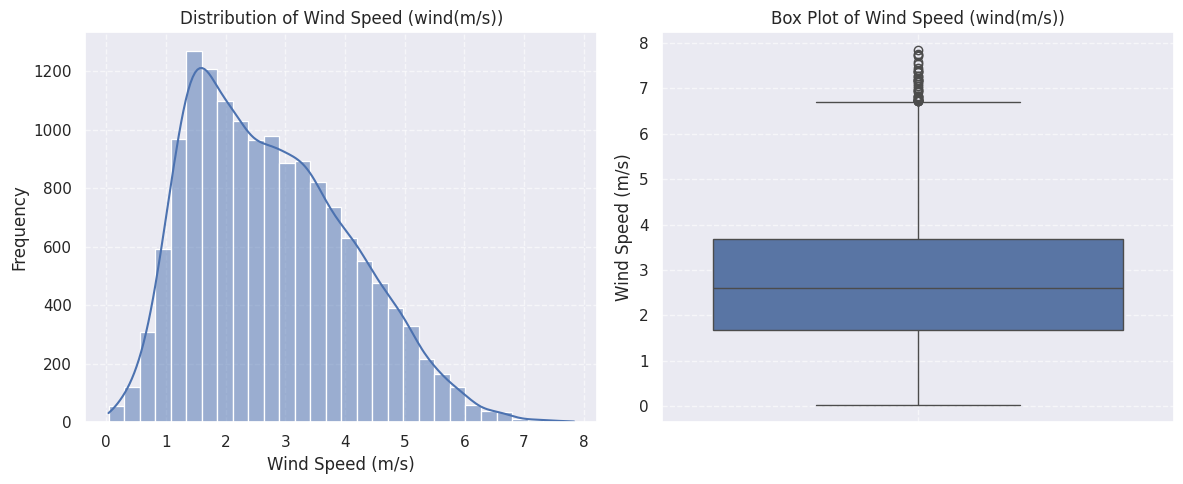

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'df' is your preprocessed DataFrame

plt.figure(figsize=(12, 5))

# Subplot 1: Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df['wind(m/s)'], kde=True, bins=30)
plt.title('Distribution of Wind Speed (wind(m/s))')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)

# Subplot 2: Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['wind(m/s)'])
plt.title('Box Plot of Wind Speed (wind(m/s))')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

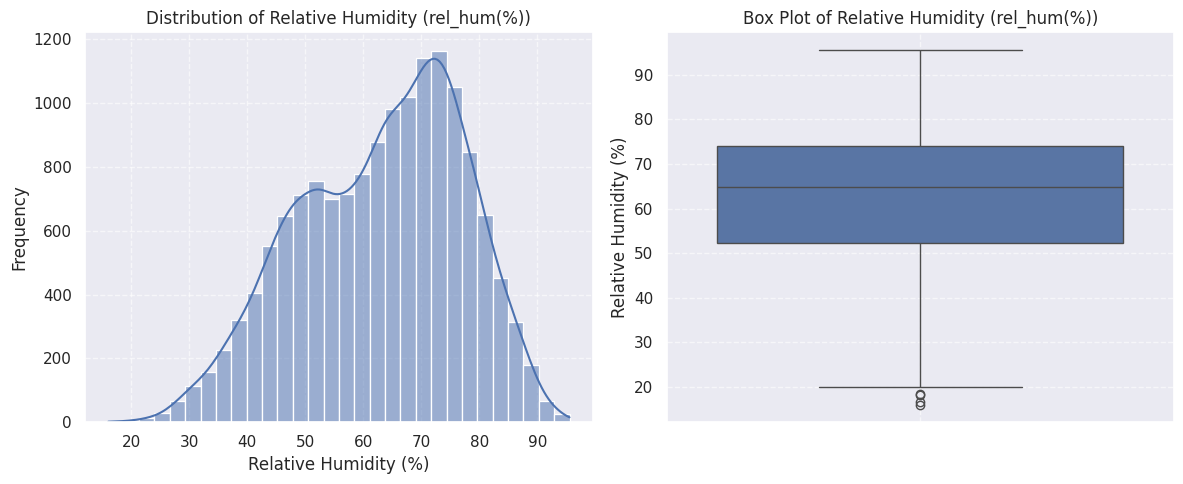

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'df' is your preprocessed DataFrame

plt.figure(figsize=(12, 5))

# Subplot 1: Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df['rel_hum(%)'], kde=True, bins=30)
plt.title('Distribution of Relative Humidity (rel_hum(%))')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)

# Subplot 2: Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['rel_hum(%)'])
plt.title('Box Plot of Relative Humidity (rel_hum(%))')
plt.ylabel('Relative Humidity (%)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

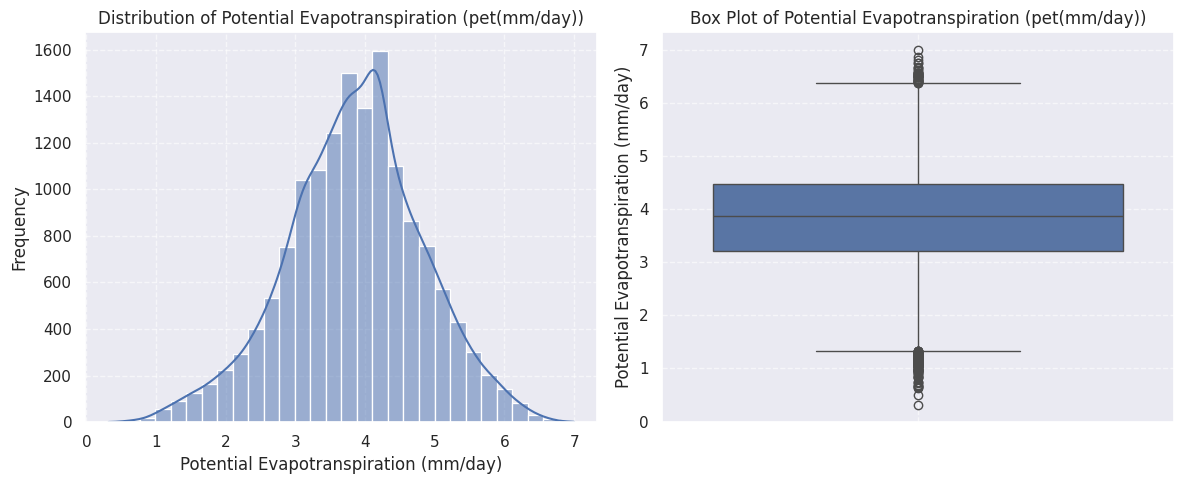

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'df' is your preprocessed DataFrame

plt.figure(figsize=(12, 5))

# Subplot 1: Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df['pet(mm/day)'], kde=True, bins=30)
plt.title('Distribution of Potential Evapotranspiration (pet(mm/day))')
plt.xlabel('Potential Evapotranspiration (mm/day)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)

# Subplot 2: Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['pet(mm/day)'])
plt.title('Box Plot of Potential Evapotranspiration (pet(mm/day))')
plt.ylabel('Potential Evapotranspiration (mm/day)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

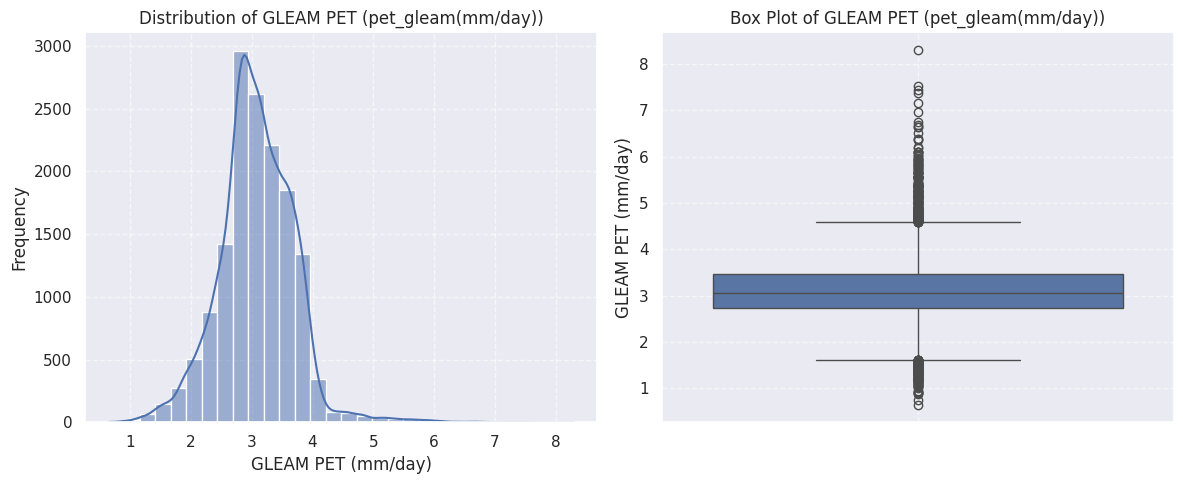

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'df' is your preprocessed DataFrame

plt.figure(figsize=(12, 5))

# Subplot 1: Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df['pet_gleam(mm/day)'], kde=True, bins=30)
plt.title('Distribution of GLEAM PET (pet_gleam(mm/day))')
plt.xlabel('GLEAM PET (mm/day)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)

# Subplot 2: Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['pet_gleam(mm/day)'])
plt.title('Box Plot of GLEAM PET (pet_gleam(mm/day))')
plt.ylabel('GLEAM PET (mm/day)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

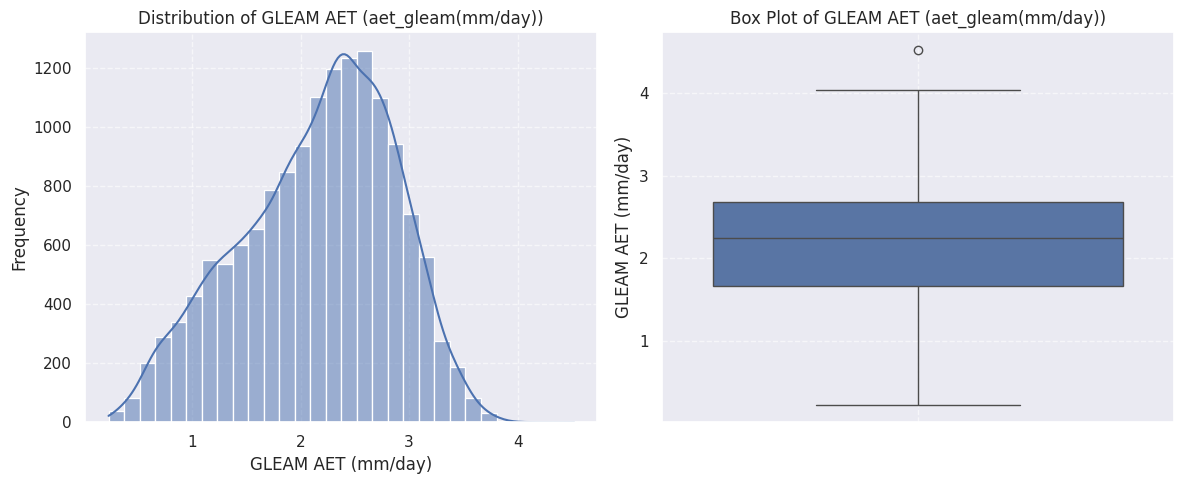

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'df' is your preprocessed DataFrame

plt.figure(figsize=(12, 5))

# Subplot 1: Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df['aet_gleam(mm/day)'], kde=True, bins=30)
plt.title('Distribution of GLEAM AET (aet_gleam(mm/day))')
plt.xlabel('GLEAM AET (mm/day)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)

# Subplot 2: Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['aet_gleam(mm/day)'])
plt.title('Box Plot of GLEAM AET (aet_gleam(mm/day))')
plt.ylabel('GLEAM AET (mm/day)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

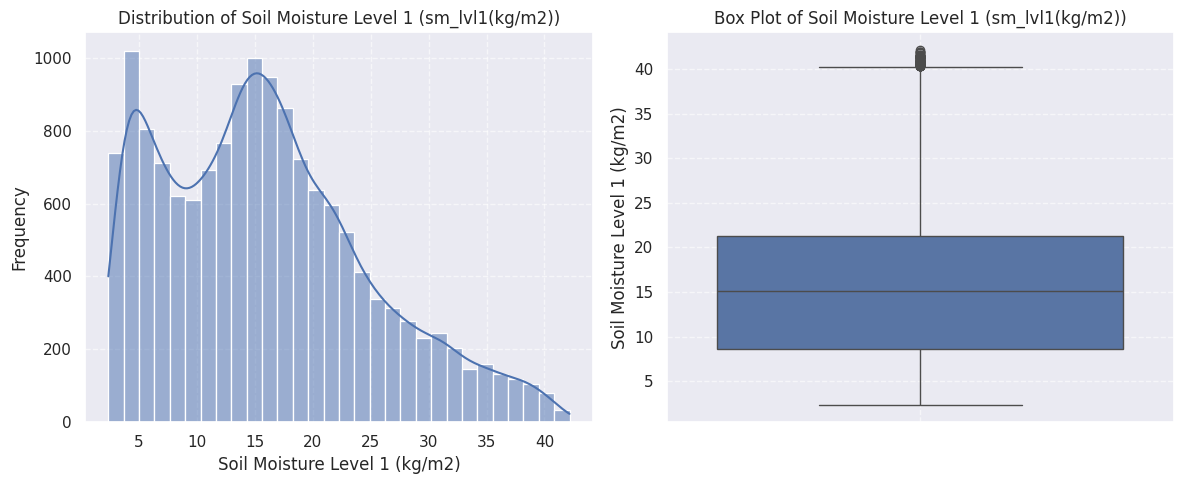

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'df' is your preprocessed DataFrame

plt.figure(figsize=(12, 5))

# Subplot 1: Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df['sm_lvl1(kg/m2)'], kde=True, bins=30)
plt.title('Distribution of Soil Moisture Level 1 (sm_lvl1(kg/m2))')
plt.xlabel('Soil Moisture Level 1 (kg/m2)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)

# Subplot 2: Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['sm_lvl1(kg/m2)'])
plt.title('Box Plot of Soil Moisture Level 1 (sm_lvl1(kg/m2))')
plt.ylabel('Soil Moisture Level 1 (kg/m2)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

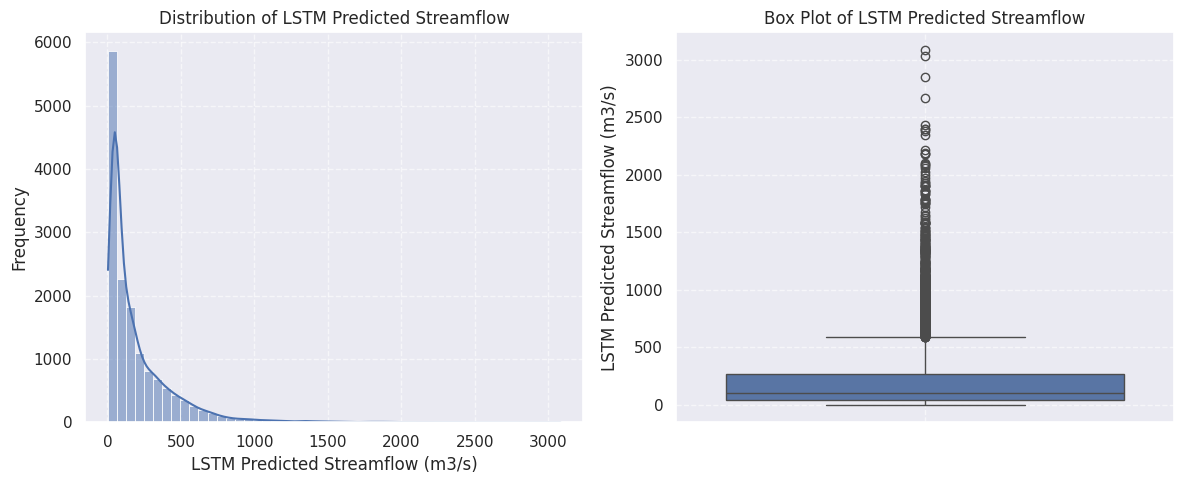

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'df' is your preprocessed DataFrame

plt.figure(figsize=(12, 5))

# Subplot 1: Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df['lstm_streamflow'], kde=True, bins=50)
plt.title('Distribution of LSTM Predicted Streamflow')
plt.xlabel('LSTM Predicted Streamflow (m3/s)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)

# Subplot 2: Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['lstm_streamflow'])
plt.title('Box Plot of LSTM Predicted Streamflow')
plt.ylabel('LSTM Predicted Streamflow (m3/s)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

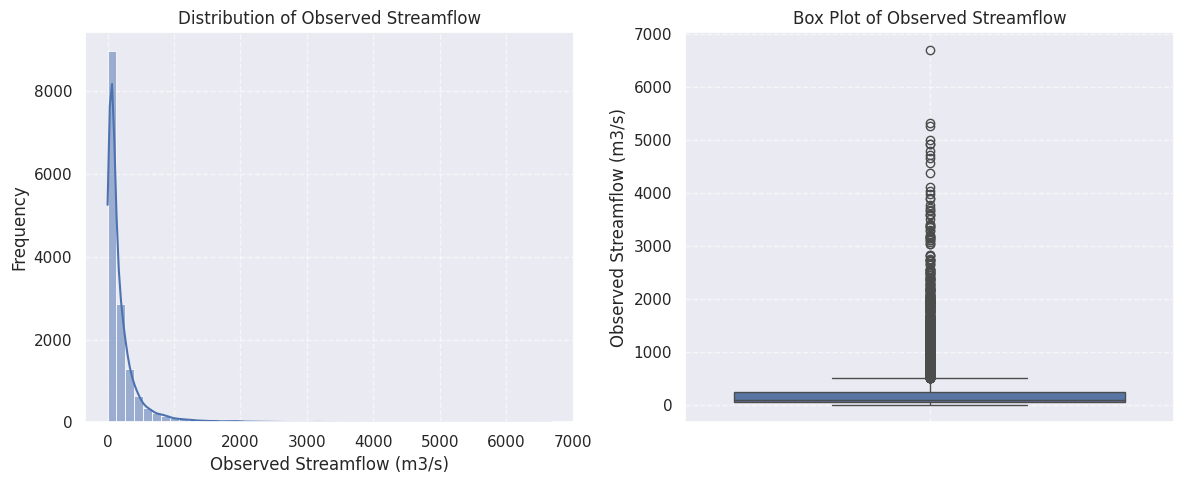

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'df' is your preprocessed DataFrame

plt.figure(figsize=(12, 5))

# Subplot 1: Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df['streamflow_observed'], kde=True, bins=50)
plt.title('Distribution of Observed Streamflow')
plt.xlabel('Observed Streamflow (m3/s)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)

# Subplot 2: Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['streamflow_observed'])
plt.title('Box Plot of Observed Streamflow')
plt.ylabel('Observed Streamflow (m3/s)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

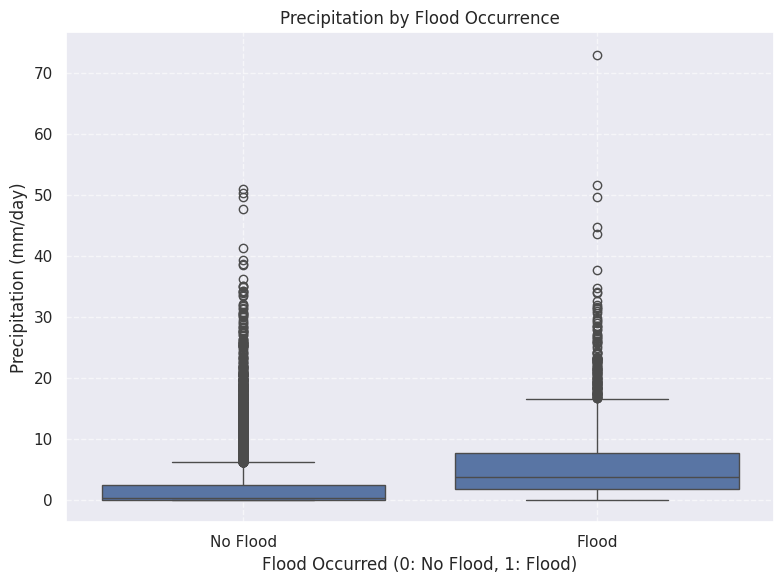

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'df' is your preprocessed DataFrame

plt.figure(figsize=(8, 6))
sns.boxplot(x='flood_occurred', y='prcp(mm/day)', data=df)
plt.title('Precipitation by Flood Occurrence')
plt.xlabel('Flood Occurred (0: No Flood, 1: Flood)')
plt.ylabel('Precipitation (mm/day)')
plt.xticks(ticks=[0, 1], labels=['No Flood', 'Flood'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

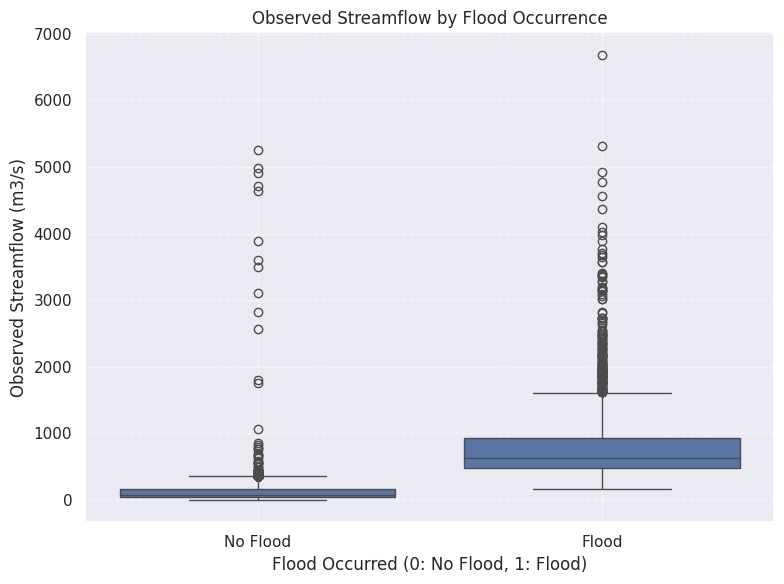

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'df' is your preprocessed DataFrame

plt.figure(figsize=(8, 6))
sns.boxplot(x='flood_occurred', y='streamflow_observed', data=df)
plt.title('Observed Streamflow by Flood Occurrence')
plt.xlabel('Flood Occurred (0: No Flood, 1: Flood)')
plt.ylabel('Observed Streamflow (m3/s)')
plt.xticks(ticks=[0, 1], labels=['No Flood', 'Flood'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

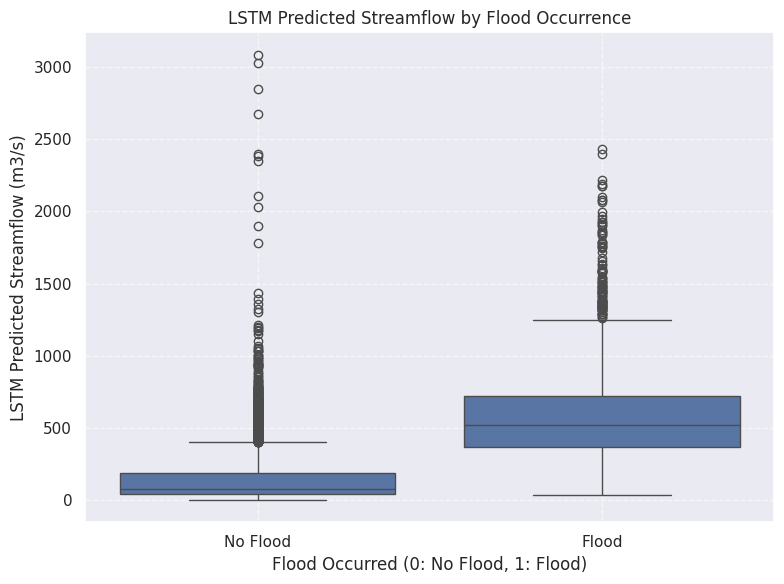

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'df' is your preprocessed DataFrame

plt.figure(figsize=(8, 6))
sns.boxplot(x='flood_occurred', y='lstm_streamflow', data=df)
plt.title('LSTM Predicted Streamflow by Flood Occurrence')
plt.xlabel('Flood Occurred (0: No Flood, 1: Flood)')
plt.ylabel('LSTM Predicted Streamflow (m3/s)')
plt.xticks(ticks=[0, 1], labels=['No Flood', 'Flood'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

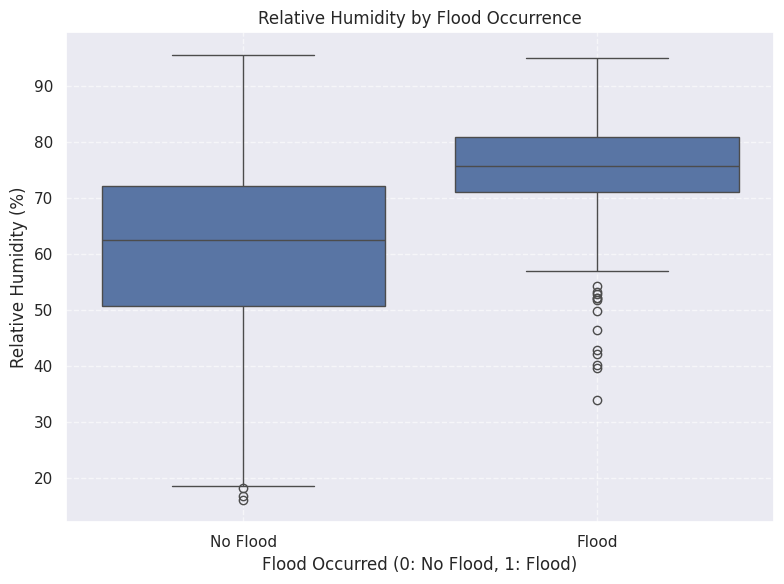

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'df' is your preprocessed DataFrame

plt.figure(figsize=(8, 6))
sns.boxplot(x='flood_occurred', y='rel_hum(%)', data=df)
plt.title('Relative Humidity by Flood Occurrence')
plt.xlabel('Flood Occurred (0: No Flood, 1: Flood)')
plt.ylabel('Relative Humidity (%)')
plt.xticks(ticks=[0, 1], labels=['No Flood', 'Flood'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

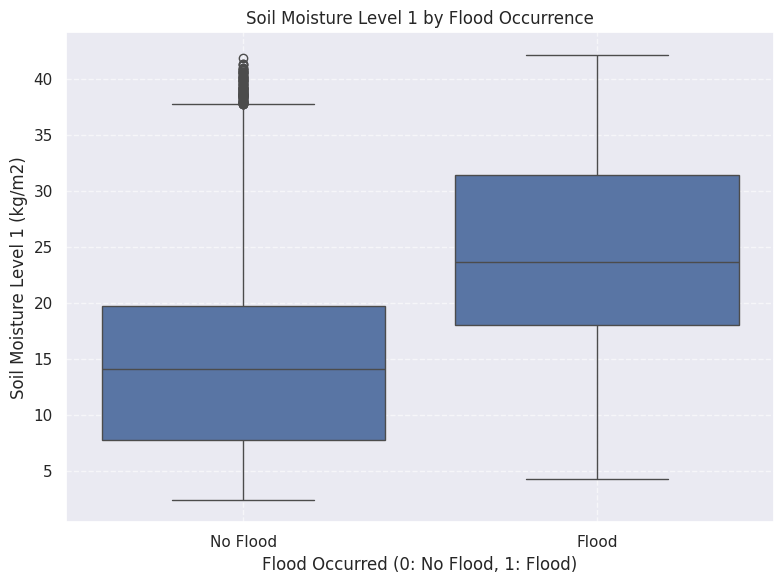

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'df' is your preprocessed DataFrame

plt.figure(figsize=(8, 6))
sns.boxplot(x='flood_occurred', y='sm_lvl1(kg/m2)', data=df)
plt.title('Soil Moisture Level 1 by Flood Occurrence')
plt.xlabel('Flood Occurred (0: No Flood, 1: Flood)')
plt.ylabel('Soil Moisture Level 1 (kg/m2)')
plt.xticks(ticks=[0, 1], labels=['No Flood', 'Flood'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

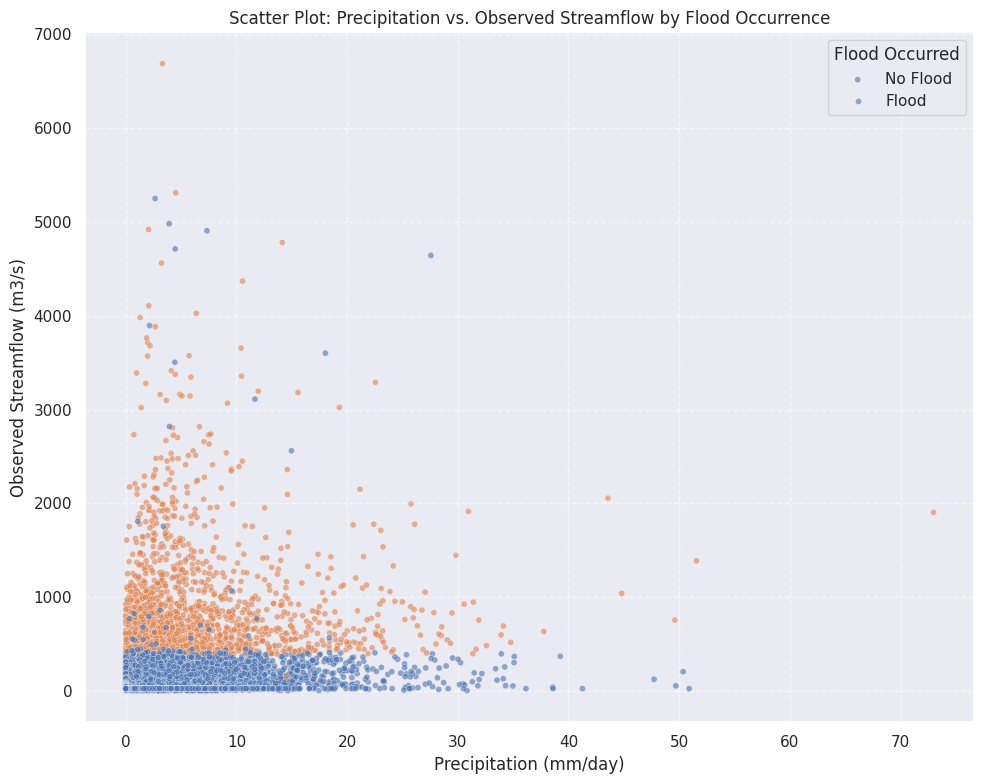

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'df' is your preprocessed DataFrame

plt.figure(figsize=(10, 8))
sns.scatterplot(x='prcp(mm/day)', y='streamflow_observed', hue='flood_occurred', data=df, alpha=0.6, s=20)
plt.title('Scatter Plot: Precipitation vs. Observed Streamflow by Flood Occurrence')
plt.xlabel('Precipitation (mm/day)')
plt.ylabel('Observed Streamflow (m3/s)')
plt.legend(title='Flood Occurred', labels=['No Flood', 'Flood'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [29]:
df.head()

,prcp(mm/day),tmax(C),tmin(C),tavg(C),srad_lw(w/m2),srad_sw(w/m2),wind_u(m/s),wind_v(m/s),wind(m/s),rel_hum(%),pet(mm/day),pet_gleam(mm/day),aet_gleam(mm/day),evap_canopy(mm/day),evap_surface(mm/day),sm_lvl1(kg/m2),sm_lvl2(kg/m2),sm_lvl3(kg/m2),sm_lvl4(kg/m2),lstm_streamflow,streamflow_observed,flood_occurred
date,,,,,,,,,,,,,,,,,,,,,,
1980-01-01,0.0,28.11,14.04,21.08,335.40,308.97,0.51,-0.20,0.55,57.89,4.17,2.85,2.03,0.0,0.79,6.93,66.29,153.43,511.52,73.769,111.1,0
1980-01-02,0.0,28.33,13.94,21.14,345.16,303.75,0.42,0.48,0.64,60.80,4.17,2.90,2.07,0.0,0.75,6.74,66.07,153.25,511.37,98.157,113.4,0
1980-01-03,0.0,28.16,14.35,21.26,349.14,300.51,0.63,0.29,0.69,61.53,4.17,2.76,1.89,0.0,0.70,6.56,65.85,153.09,511.23,121.992,104.3,0
1980-01-04,0.0,28.33,14.83,21.58,353.16,299.13,-1.65,0.79,1.83,55.99,4.17,2.71,1.81,0.0,0.73,6.39,65.64,152.91,511.09,133.136,104.1,0
1980-01-05,0.0,28.05,14.73,21.39,348.57,305.00,-1.61,0.74,1.77,52.61,4.17,2.88,1.92,0.0,0.73,6.23,65.42,152.74,510.95,133.301,103.7,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14976 entries, 1980-01-01 to 2020-12-31
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   prcp(mm/day)          14976 non-null  float64
 1   tmax(C)               14976 non-null  float64
 2   tmin(C)               14976 non-null  float64
 3   tavg(C)               14976 non-null  float64
 4   srad_lw(w/m2)         14976 non-null  float64
 5   srad_sw(w/m2)         14976 non-null  float64
 6   wind_u(m/s)           14976 non-null  float64
 7   wind_v(m/s)           14976 non-null  float64
 8   wind(m/s)             14976 non-null  float64
 9   rel_hum(%)            14976 non-null  float64
 10  pet(mm/day)           14976 non-null  float64
 11  pet_gleam(mm/day)     14976 non-null  float64
 12  aet_gleam(mm/day)     14976 non-null  float64
 13  evap_canopy(mm/day)   14976 non-null  float64
 14  evap_surface(mm/day)  14976 non-null  float64
 15  sm

In [31]:
selected_col = ['prcp(mm/day)',
'tavg(C)',
'srad_sw(w/m2)',
'wind(m/s)',
'rel_hum(%)',
'pet_gleam(mm/day)',
'aet_gleam(mm/day)',
'evap_canopy(mm/day)',
'evap_surface(mm/day)',
'sm_lvl1(kg/m2)',
'sm_lvl2(kg/m2)',
'sm_lvl3(kg/m2)',
'sm_lvl4(kg/m2)',
'streamflow_observed',
'flood_occurred']

In [33]:
df = df[selected_col]

In [37]:
df.head()

,prcp(mm/day),tavg(C),srad_sw(w/m2),wind(m/s),rel_hum(%),pet_gleam(mm/day),aet_gleam(mm/day),evap_canopy(mm/day),evap_surface(mm/day),sm_lvl1(kg/m2),sm_lvl2(kg/m2),sm_lvl3(kg/m2),sm_lvl4(kg/m2),streamflow_observed,flood_occurred
date,,,,,,,,,,,,,,,
1980-01-01,0.0,21.08,308.97,0.55,57.89,2.85,2.03,0.0,0.79,6.93,66.29,153.43,511.52,111.1,0
1980-01-02,0.0,21.14,303.75,0.64,60.80,2.90,2.07,0.0,0.75,6.74,66.07,153.25,511.37,113.4,0
1980-01-03,0.0,21.26,300.51,0.69,61.53,2.76,1.89,0.0,0.70,6.56,65.85,153.09,511.23,104.3,0
1980-01-04,0.0,21.58,299.13,1.83,55.99,2.71,1.81,0.0,0.73,6.39,65.64,152.91,511.09,104.1,0
1980-01-05,0.0,21.39,305.00,1.77,52.61,2.88,1.92,0.0,0.73,6.23,65.42,152.74,510.95,103.7,0


In [38]:
df = df.sort_index()

# --- 1. LAG FEATURES ---
lag_days = [1, 3, 7]
for col in ['prcp(mm/day)', 'tavg(C)', 'pet_gleam(mm/day)', 'aet_gleam(mm/day)', 'sm_lvl1(kg/m2)', 'streamflow_observed']:
    for lag in lag_days:
        df[f'{col}_lag_{lag}'] = df[col].shift(lag)

# --- 2. ROLLING WINDOW STATS ---
df['prcp_7d_sum'] = df['prcp(mm/day)'].rolling(window=7).sum()
df['tavg_7d_mean'] = df['tavg(C)'].rolling(window=7).mean()
df['pet_7d_mean'] = df['pet_gleam(mm/day)'].rolling(window=7).mean()

# --- 3. DIFFERENCING FEATURES ---
df['prcp_diff_1'] = df['prcp(mm/day)'] - df['prcp(mm/day)'].shift(1)
df['streamflow_diff_1'] = df['streamflow_observed'] - df['streamflow_observed'].shift(1)

# --- 4. ANTECEDENT WETNESS INDEX (prcp + sm_lvl1) ---
df['antecedent_wetness'] = df['prcp_7d_sum'] + df['sm_lvl1(kg/m2)']

# --- 5. DATE-BASED SEASONALITY FEATURES ---
df['month'] = df.index.month
df['dayofyear'] = df.index.dayofyear
df['is_wet_season'] = df['month'].isin([6, 7, 8, 9]).astype(int)  # adjust to your region

# Optional: drop rows with NaNs introduced by shifting/rolling
df = df.dropna()

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14969 entries, 1980-01-08 to 2020-12-31
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   prcp(mm/day)               14969 non-null  float64
 1   tavg(C)                    14969 non-null  float64
 2   srad_sw(w/m2)              14969 non-null  float64
 3   wind(m/s)                  14969 non-null  float64
 4   rel_hum(%)                 14969 non-null  float64
 5   pet_gleam(mm/day)          14969 non-null  float64
 6   aet_gleam(mm/day)          14969 non-null  float64
 7   evap_canopy(mm/day)        14969 non-null  float64
 8   evap_surface(mm/day)       14969 non-null  float64
 9   sm_lvl1(kg/m2)             14969 non-null  float64
 10  sm_lvl2(kg/m2)             14969 non-null  float64
 11  sm_lvl3(kg/m2)             14969 non-null  float64
 12  sm_lvl4(kg/m2)             14969 non-null  float64
 13  streamflow_observed        14

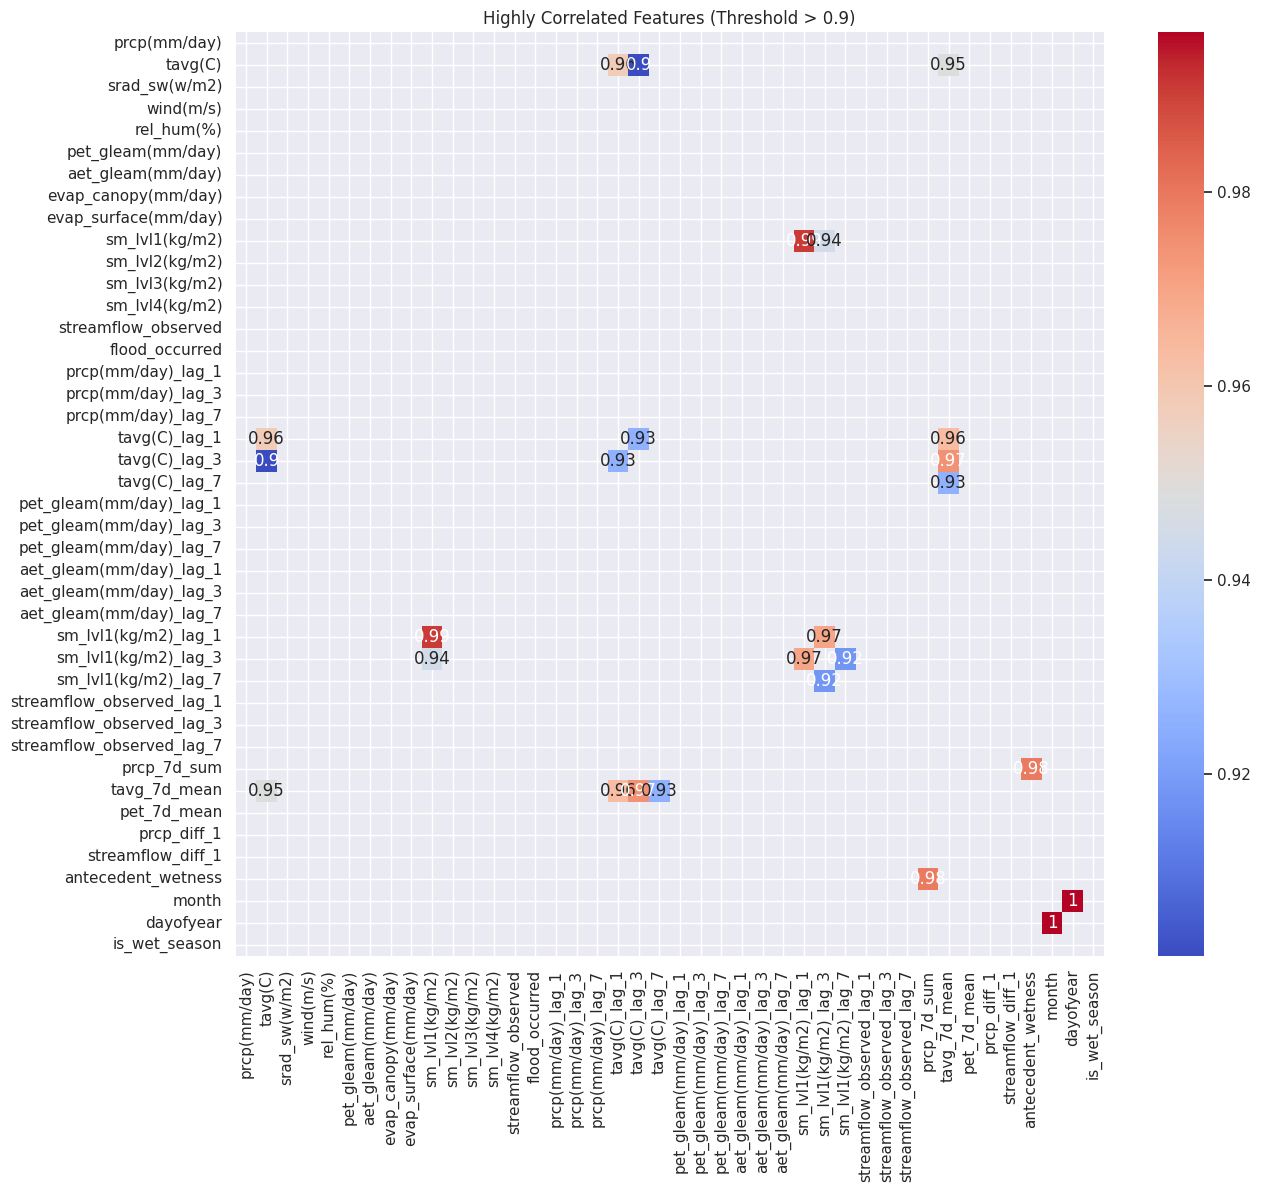

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap of only highly correlated features
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix[(corr_matrix >= 0.9) & (corr_matrix != 1)], annot=True, cmap='coolwarm')
plt.title('Highly Correlated Features (Threshold > 0.9)')
plt.show()


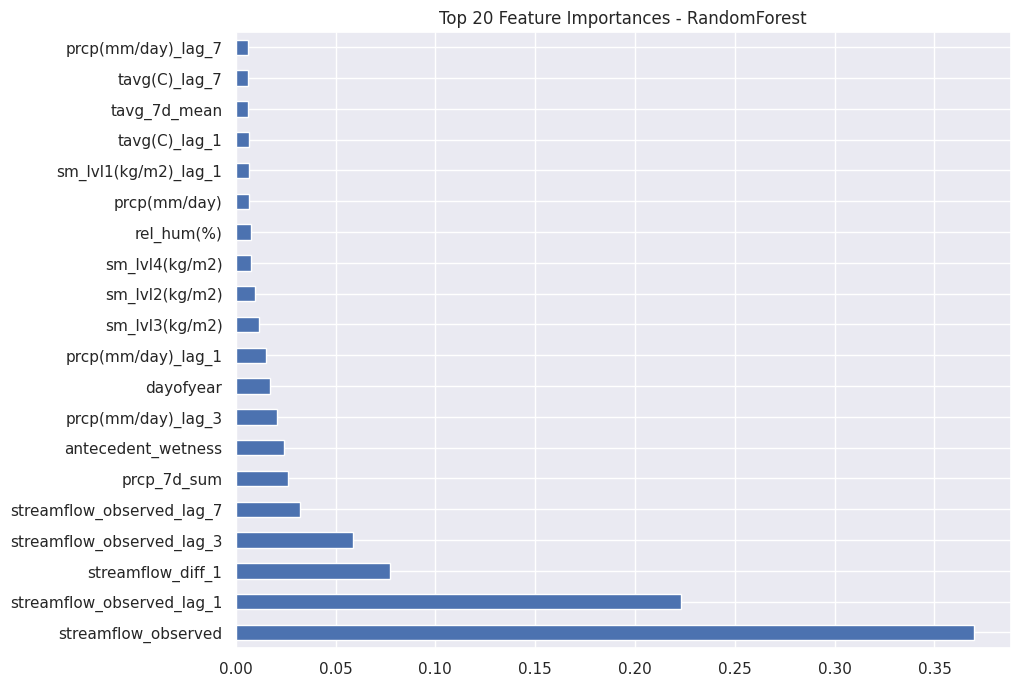

In [58]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=['flood_occurred'])
y = df['flood_occurred']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Plot top 20 features
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)
feat_importance[:20].plot(kind='barh', figsize=(10, 8))
plt.title("Top 20 Feature Importances - RandomForest")
plt.show()
